In [ ]:
### OOP lesson 1
#.upper -> method -> acting on object of type X


#class dog
class Dog:
    
    #method 1 -> this method is run first
    #self is a parameter of method
    def __init__(self, name, age):
        #attribute of Ob.
        self.name = name
        self.age = age
    
    #method 2
    def get_name(self):
        return self.name
    
    #method 3
    def get_age(self):
        return self.age

    #method 4
    def bark(self):
        print("bark")
        
    #method 5
    def add_one(self,x):
        return x + 1
    
    #method 6
    def set_age(self, age):
        self.age = age
        
#make d an object of class Dog
d1 = Dog("Tim", 10)
d1.set_age(20)
print(d1.get_age())

In [ ]:
### OOP lesson 2 (class inside a class)

class Student:
    
    def __init__(self, name,age,grade):
        self.name = name
        self.age = age
        self.grade = grade
        
    def get_grade(self):
        return self.grade
    

    
class Course:
    
    def __init__(self,name,max_students):
        self.name = name
        self.max_students = max_students
        self.students = []
        
    def add_student(self, student):
        if len(self.students) < self.max_students:
            self.students.append(student)
            return True
        return False
    
    def get_average_grade(self):
        value = 0
        for student in self.students:
            value += student.get_grade()
        return value / len(self.students)
    
s1 = Student("Tim",19,95)
s2 = Student("Bill",19,75)
s3 = Student("Jill",19,65)

course = Course("Science",2)
course.add_student(s1)
course.add_student(s2)
print(course.add_student(s3))
print(course.get_average_grade())

In [5]:
### OOP lesson 3 (inheritance)

#general class (PARENT)
class Pet:
    def __init__(self,name,age):
        self.name = name
        self.age = age
        
    def show(self):
        print(f"I am {self.name} and I am {self.age} years old")
        
    def speak(self):
        print("I don't know what I say")

#lower level specific class (CHILD)
class Cat(Pet):
    
    #name and age are inheritted from PARENT
    def __init__(self, name, age,colour):
        #take data from PARENT
        super().__init__(name,age)
        self.colour = colour
        
    def speak(self):
        print("Meow")
        
    def show(self):
        print(f"I am {self.name} and I am {self.age} years old and I am {self.colour} colour")

#lower level specific class
class Dog(Pet):   
    def speak(self):
        print("Woof")     
        
#lower level specific class
class Fish(Pet):   
    pass
        
p = Pet("Tim",19)
p.speak()
p.show()
c = Cat("Bill",34,'red')
c.speak()
c.show()
d = Dog("Jill",24)
d.speak()
d.show()
e = Fish("bubble",1)
e.speak()

I don't know what I say
I am Tim and I am 19 years old
Meow
I am Bill and I am 34 years old and I am red colour
Woof
I am Jill and I am 24 years old
I don't know what I say


In [17]:
### OOP lesson 4 class methods and attributes

class Person:
    #class attribute
    number_of_people = 0
    gravity = 9.81
    
    #normal method
    def __init__(self,name):
        self.name = name
        Person.add_person()
    
    #class method
    @classmethod
    def number_of_people_(cls):
        return cls.number_of_people
    
    @classmethod
    def add_person(cls):
        cls.number_of_people += 1
    
    
        
p1 = Person("tim")
p2 = Person("jill")
print(Person.number_of_people_())

#print(p2.number_of_people)

2


In [19]:
### OOP lesson 5 STATIC METHOD

class Math:
    
    #acts as function inside a class
    @staticmethod
    def add5(x):
        return x + 5
    
    @staticmethod
    def add10(x):
        return x + 10
    
    @staticmethod
    def pr():
        print("run")
    
print(Math.add5(5))
Math.pr()

10
run


2D heat equation solver


MovieWriter ffmpeg unavailable; using Pillow instead.


Done!


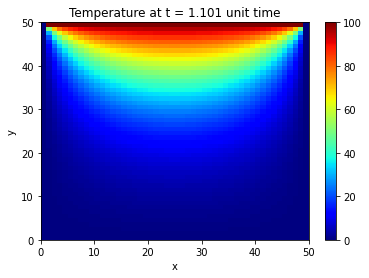

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("2D heat equation solver")

plate_length = 50
max_iter_time = 750

alpha = 170
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=5, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

print("Done!")